In [2]:
import urllib
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

Let's download an image and save to a local file.

In [4]:
photo_url = 'https://upload.wikimedia.org/wikipedia/commons/d/d1/Madonna_Rebel_Heart_Tour_2015_-_Stockholm_%2823051472299%29_%28cropped_2%29.jpg'
urllib.request.urlretrieve(photo_url, 'madonna.jpg')

('madonna.jpg', <http.client.HTTPMessage at 0x7f5efc4124e0>)

OpenCV provides basic image io function like `imread` and `imwrite`. `cv2.imread` reads an image and return the image as numpy array.

In [5]:
img = cv2.imread('madonna.jpg')

In [6]:
img.shape

(2114, 1682, 3)

You often need to be careful about image dimension. When image is represented as a numpy array, height (y axis) is the first dimension and width (x axis) is the second dimension. OpenCV argument is often in the (x,y) format. Let's see `cv2.resize` as an example.

In [7]:
# usage destination = cv2.resize(source_image, (destination_x_dimension, destination_y_dimension))
img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))

In [8]:
img.shape

(528, 420, 3)

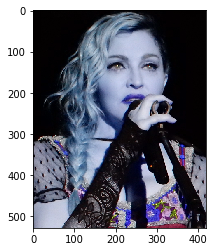

In [9]:
plt.imshow(img)

What's wrong here? OpenCV reads in image in BGR format. Namely, the first channel represents blue, the second green and the third red. We can use opencv function `cv2.cvtColor` to change color format.

In [10]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

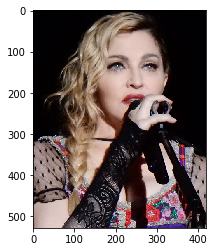

In [11]:
plt.imshow(img1)

Since the image object returned by OpenCV is actually a 3-d numpy array. We can also convert color format this way:

In [12]:
img2 = img[:,:,[2,1,0]]
# or img2 = img[:,:,::-1]

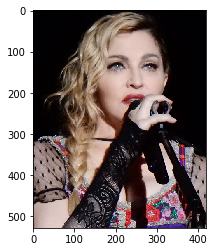

In [13]:
plt.imshow(img2)

You will notice that the origin of the image coordinate is actually at left upper corner. This is a convention in image proecssing. If we try to get a slice of the image, we'll see more clearly.

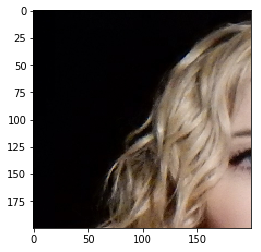

In [14]:
plt.imshow(img2[:200,:200, :])

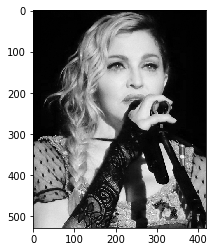

In [15]:
plt.imshow(img2[:,:,0], cmap='gray')

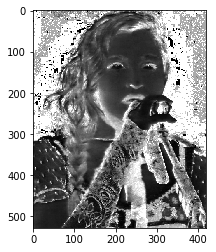

In [16]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,1], cmap='gray')

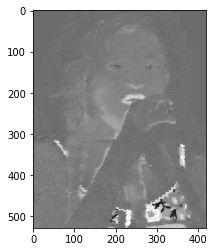

In [17]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab[:,:,1], cmap='gray')

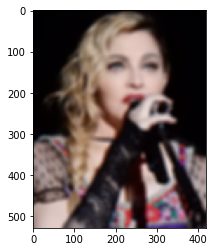

In [18]:
plt.imshow(cv2.GaussianBlur(img1, (15,15), 5))

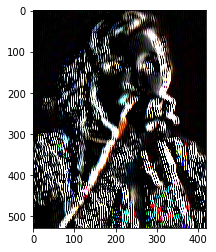

In [19]:
gk = cv2.getGaborKernel(ksize=(15,15), sigma=5, theta=3, lambd=5, gamma=0.5)
plt.imshow(cv2.filter2D(img1, cv2.CV_8UC3, gk))

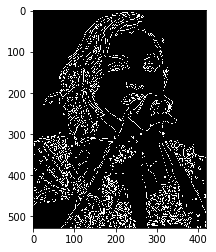

In [20]:
plt.imshow(cv2.Canny(img1,100,200), cmap='gray')